In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gc
import pickle
import pathlib
import tqdm
import numpy as np
import numpy.random
import pandas as pd
from sklearn import svm
import sklearn.metrics as metr
import sklearn.preprocessing as pp
import sklearn.linear_model as lm
import sklearn.neighbors.nearest_centroid as nc
import sklearn.neighbors as ne
import sklearn.naive_bayes as nb
import sklearn.ensemble as em
import sklearn.discriminant_analysis as da
import sklearn.gaussian_process as gp
from sklearn import tree
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.base import clone
import sklearn.model_selection as ms
import gestureanalysis.svm_helpers as svmhelper
import sklearn.utils
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_path = "/home/jsimon/Documents/thesis/gesture-analysis/data/"
time_groups_path_corrected_pickl = base_path+"transformed/time_added/all/time-and-groups-corrected-all.pkl"
stats_added_base_path = base_path+"transformed/stats_added/all/"
stats_added_path_pickl = stats_added_base_path+"raw_stats-added-all.pkl"
gyro_calibration_path = base_path+'../scripts/gestureanalysis/gyro_offset.txt'

In [4]:
import os
os.getcwd()

'/home/jsimon/Documents/thesis/gesture-analysis/scripts'

In [5]:
path = f"{stats_added_base_path}CF58-window-data.pkl"
with open( path, "rb" ) as users_pickle_file:
    data = pickle.load(users_pickle_file)

In [6]:
data_df = data['windata']
labels_df = data['winlabels']

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3969 entries, 0 to 3968
Columns: 7201 entries, 0_0_Thumb_base_mean to 7200_xcorr_8_10
dtypes: float64(7201)
memory usage: 218.1 MB


In [8]:
# we fill the NaN values:
data_df.fillna(method='backfill', inplace=True)

In [9]:
headers = list(data_df.columns)
print(headers[0:3])

['0_0_Thumb_base_mean', '0_1_Thumb_base_std', '0_2_Thumb_base_min']


In [10]:
nh = len(headers)
headers = np.array(headers).reshape(1,nh)

In [11]:
X = data_df.values
print(X.shape)

(3969, 7201)


In [12]:
np.argwhere(np.isnan(X)).shape

(0, 2)

In [13]:
def simple_label_vec(labels_df, gestures):
    y = np.zeros((len(labels_df),))
    for index, row in labels_df.iterrows():
        if row.values.sum() == 0:
            y[index] = 0
        else:
            idx = row.idxmax()
            y[index] = gestures.index(idx) + 1
    return y

In [14]:
gestures = ['(1) One', '(2) Two', '(3) Three', '(4) Four', '(5) Five', 'Calling', 'Come here', 'Continue', 'Cutthroat', 'Down', 'Go away', 'Grasp 1', 'Grasp 2', 'Knocking', 'Money', 'Never mind', 'Point', 'Point to self', 'Push away', 'Scissor', 'Shoot', 'Shoulder pat', 'Swipe left', 'Swipe right', 'Swipe up', 'Talking', 'Thumbs down', 'Thumbs up', 'Turn', 'Up', 'Walking', 'Waving', 'Zoom']
gestures.sort()
print(len(gestures))
print(gestures)

33
['(1) One', '(2) Two', '(3) Three', '(4) Four', '(5) Five', 'Calling', 'Come here', 'Continue', 'Cutthroat', 'Down', 'Go away', 'Grasp 1', 'Grasp 2', 'Knocking', 'Money', 'Never mind', 'Point', 'Point to self', 'Push away', 'Scissor', 'Shoot', 'Shoulder pat', 'Swipe left', 'Swipe right', 'Swipe up', 'Talking', 'Thumbs down', 'Thumbs up', 'Turn', 'Up', 'Walking', 'Waving', 'Zoom']


In [15]:
y = simple_label_vec(labels_df, gestures)

In [16]:
y = y.astype(np.int)

In [17]:
y.shape

(3969,)

In [18]:
with open( stats_added_base_path+'scaler.pkl', "rb" ) as users_pickle_file:
    transformer = pickle.load(users_pickle_file)

In [19]:
data_df.iloc[:, :] = transformer.transform(data_df.values)

## Load the different datasets and work with that:

In [65]:
with open( stats_added_base_path+'train-data-rfecv4.pk', "rb" ) as users_pickle_file:
    features = pickle.load(users_pickle_file)['headers']

In [55]:
with open( stats_added_base_path+'train-data-rfecv3.pk', "rb" ) as users_pickle_file:
    features = pickle.load(users_pickle_file)['headers']

In [45]:
with open( stats_added_base_path+'train-data-rfecv2.pk', "rb" ) as users_pickle_file:
    features = pickle.load(users_pickle_file)['headers']

In [33]:
with open( stats_added_base_path+'train-data-rfecv1.pkl', "rb" ) as users_pickle_file:
    features = pickle.load(users_pickle_file)['headers']

In [20]:
with open( stats_added_base_path+'train-data-rfe.pkl', "rb" ) as users_pickle_file:
    features = pickle.load(users_pickle_file)['headers']

In [20]:
with open( stats_added_base_path+'train-data-scaled-mutual-inf60.pkl', "rb" ) as users_pickle_file:
    features = pickle.load(users_pickle_file)['headers']

In [33]:
with open( stats_added_base_path+'train-data-scaled-f-ANOVA60.pkl', "rb" ) as users_pickle_file:
    features = pickle.load(users_pickle_file)['headers']

In [20]:
with open( stats_added_base_path+'train-data-scaled-noconst.pkl', "rb" ) as users_pickle_file:
    features = pickle.load(users_pickle_file)['headers']

In [66]:
f = list(features.flatten())

In [67]:
d = data_df[f]

In [68]:
X = d.values
print(X.shape)

(3969, 192)


In [69]:
with open( stats_added_base_path+'rfecv-a09cls.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [59]:
with open( stats_added_base_path+'rfecv-a05cls.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [49]:
with open( stats_added_base_path+'rfecv-a001cls.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [37]:
with open( stats_added_base_path+'rfecv-a01cls.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [24]:
with open( stats_added_base_path+'rfe-a01cls.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [24]:
with open( stats_added_base_path+'mutual-inf-clss.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [37]:
with open( stats_added_base_path+'fANOVA-clss.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [24]:
with open( stats_added_base_path+'full-clss.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [71]:
results[-4]

('random forrest',
 0.9367927578402845,
 0.9970364643731477,
 array([[  1,   0,   0, ...,   0,   0,   0],
        [  6, 219,   1, ...,   0,   0,   2],
        [  2,  18, 183, ...,   0,   0,   0],
        ...,
        [  5,   5,   0, ..., 218,   0,   0],
        [  0,   1,   0, ...,   0, 210,   0],
        [  0,   9,   0, ...,   0,   0, 182]]),
 RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='gini', max_depth=None, max_features='auto',
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=3, oob_score=False, random_state=None,
             verbose=True, warm_start=False))

In [72]:
clf = results[-4][-1]
#clf = results[-5]['best_classifier'][4]

In [73]:
predictions = clf.predict(X)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished


In [74]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2435
           1       0.02      1.00      0.04        48
           2       0.91      0.89      0.90        46
           3       1.00      0.51      0.68        51
           4       0.98      0.98      0.98        47
           5       0.94      1.00      0.97        50
           6       0.98      0.88      0.92        48
           7       1.00      0.79      0.88        56
           8       1.00      1.00      1.00        49
           9       0.98      0.96      0.97        46
          10       0.93      0.95      0.94        42
          11       0.98      1.00      0.99        43
          12       0.90      0.90      0.90        60
          13       0.88      0.90      0.89        42
          14       0.98      0.84      0.91        51
          16       0.98      0.98      0.98        44
          17       0.92      1.00      0.96        48
          18       1.00    

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
cm = confusion_matrix(y, predictions)

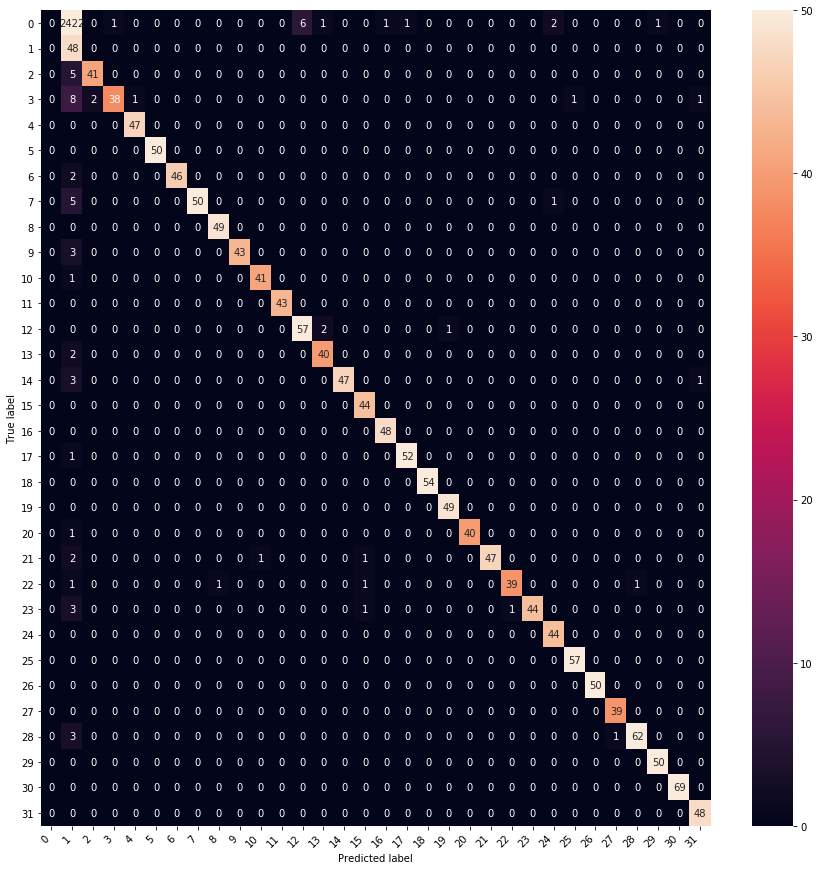

In [44]:
f, axarr = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(cm, annot=True, fmt="d", ax=axarr, vmax = 50)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [48]:
with open( stats_added_base_path+'sensor-selection-rel-1910.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [40]:
with open( stats_added_base_path+'sensor-selection-rel-765.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [54]:
with open( stats_added_base_path+'sensor-selection-rel-192.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [60]:
with open( stats_added_base_path+'sensor-selection-abs-1910.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [65]:
with open( stats_added_base_path+'sensor-selection-abs-765.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

In [71]:
with open( stats_added_base_path+'sensor-selection-192.pkl', "rb" ) as users_pickle_file:
    results = pickle.load(users_pickle_file)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jsimon/Documents/thesis/gesture-analysis/data/transformed/stats_added/all/sensor-selection-192.pk'

In [33]:
def evaluate_feature_selection_on_test(results, data_df):
    reports = []
    sensornums = []
    for r in tqdm.tqdm_notebook(results):
        f = r['features']
        clf = r['best_classifier'][-1]
        d = data_df[list(f)]
        X = d.values
        predictions = clf.predict(X)
        cr = classification_report(y, predictions, output_dict=True)
        reports.append(cr)
        
        s = r['sensors']
        n_s = np.count_nonzero(s>0)
        sensornums.append(n_s)
    return reports, sensornums

In [66]:
reports, sensors = evaluate_feature_selection_on_test(results, data_df)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=3)]: Using backend Thre

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
/home/jsimon/anaconda3/envs/thesis/lib/p

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
/home/jsimon/anaconda3/envs/thesis/lib/p

In [67]:
mia = [d['micro avg']['f1-score'] for d in reports]

In [68]:
maa = [d['macro avg']['f1-score'] for d in reports]

In [52]:
mia_rel_1910 = mia
maa_rel_1910 = maa
sens_rel_1919 = sensors

In [47]:
mia_rel_765 = mia
maa_rel_765 = maa
sens_rel_765 = sensors

In [58]:
mia_rel_192 = mia
maa_rel_192 = maa
sens_rel_192 = sensors

In [64]:
mia_abs_1910 = mia
maa_abs_1910 = maa
sens_abs_1919 = sensors

In [69]:
mia_abs_765 = mia
maa_abs_765 = maa
sens_abs_765 = sensors

In [46]:
print(len(sensors), len(mia_rel_1910), len(mia_rel_765))

18 15 18


Text(0, 0.5, 'accuracy')

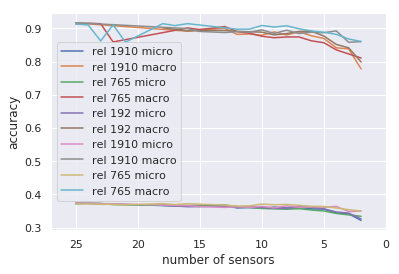

In [72]:
sns.set(color_codes=True)
sns.lineplot(x=sens_rel_1919, y=mia_rel_1910, label='rel 1910 micro')
sns.lineplot(x=sens_rel_1919, y=maa_rel_1910, label='rel 1910 macro')
sns.lineplot(x=sens_rel_765, y=mia_rel_765, label='rel 765 micro')
sns.lineplot(x=sens_rel_765, y=maa_rel_765, label='rel 765 macro')
sns.lineplot(x=sens_rel_192, y=mia_rel_192, label='rel 192 micro')
sns.lineplot(x=sens_rel_192, y=maa_rel_192, label='rel 192 macro')

sns.lineplot(x=sens_abs_1919, y=mia_abs_1910, label='rel 1910 micro')
sns.lineplot(x=sens_abs_1919, y=maa_abs_1910, label='rel 1910 macro')
sns.lineplot(x=sens_abs_765, y=mia_abs_765, label='rel 765 micro')
sns.lineplot(x=sens_abs_765, y=maa_abs_765, label='rel 765 macro')
#sns.lineplot(x=sens_rel_192, y=mia_rel_192, label='rel 192 micro')
#sns.lineplot(x=sens_rel_192, y=maa_rel_192, label='rel 192 macro')
plt.xlim(27, 0)
plt.legend()
plt.xlabel('number of sensors')
plt.ylabel('accuracy')

In [76]:
results

[{'sensors': array([[0.76842105],
         [0.38983051],
         [0.93220339],
         [0.67368421],
         [0.6       ],
         [0.65263158],
         [0.52631579],
         [0.4       ],
         [0.44210526],
         [0.41052632],
         [0.69473684],
         [0.29473684],
         [0.88135593],
         [0.61016949],
         [0.84745763],
         [0.77966102],
         [0.83050847],
         [0.88135593],
         [0.1220339 ],
         [0.2370892 ],
         [0.27966102],
         [0.21549637],
         [0.20581114],
         [0.20844687],
         [0.21610169],
         [       nan]]),
  'features': array(['0_10_Thumb_base_kurtosis', '0_11_Thumb_base_mode',
         '0_12_Thumb_base_fft_mean', ..., '7197_fftPval_8_10',
         '7198_diff_8_10', '7200_xcorr_8_10'], dtype='<U73'),
  'best_classifier': ('random forrest',
   0.9594245069511801,
   0.9977451359360907,
   array([[  1,   0,   0, ...,   0,   0,   0],
          [  2, 233,   7, ...,   0,   0,   0],
          [

In [83]:
setnum = 1

In [84]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfecv3-abs.pkl', "rb" ) as users_pickle_file:
    res1set1 = pickle.load(users_pickle_file)

In [85]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfecv2-abs.pkl', "rb" ) as users_pickle_file:
    res2set1 = pickle.load(users_pickle_file)

In [ ]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfe-abs.pkl', "rb" ) as users_pickle_file:
    res3set1 = pickle.load(users_pickle_file)

In [77]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfecv3-rel.pkl', "rb" ) as users_pickle_file:
    res4set1 = pickle.load(users_pickle_file)

In [78]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfecv2-rel.pkl', "rb" ) as users_pickle_file:
    res5set1 = pickle.load(users_pickle_file)

In [79]:
with open( stats_added_base_path+ f'set{setnum}-results1-data-rfe-rel.pkl', "rb" ) as users_pickle_file:
    res6set1 = pickle.load(users_pickle_file)

In [80]:
alltyps = [f'set{setnum+1} 1919 abs', f'set{setnum+1} 765 abs', f'set{setnum+1} 192 abs', 
           f'set{setnum+1} 1919 rel', f'set{setnum+1} 765 rel', f'set{setnum+1} 192 rel']
allres = [res1set1, res2set1, res3set1, res4set1, res5set1, res6set1]

In [81]:
def make_image(allres, alltyps, data_df):
    sns.set(color_codes=True)
    for lbl, r in zip(alltyps, allres):
        reports, sensors = evaluate_feature_selection_on_test(r, data_df)
        mia = [d['micro avg']['f1-score'] for d in reports]
        maa = [d['macro avg']['f1-score'] for d in reports]
        sns.lineplot(x=sensors, y=mia, label=lbl+' micro')
        sns.lineplot(x=sensors, y=maa, label=lbl+' macro')
    plt.xlim(27, 0)
    plt.legend()
    plt.xlabel('number of sensors')
    plt.ylabel('accuracy')

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
/home/jsimon/anaconda3/envs/thesis/lib/p

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=3)]: Using backend Thre

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=3)]: Using backend Thre

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
/home/jsimon/anaconda3/envs/thesis/lib/p

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
[Parallel(n_jobs=3)]: Using backend Threading

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
[Parallel(n_jobs=3)]: Using backend Threading

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.0s finished
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/p

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
[Parallel(n_jobs=3)]: Using backend Threading

/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jsimon/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


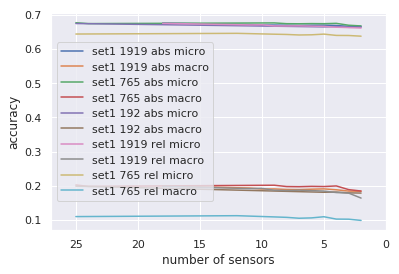

In [82]:
make_image(allres, alltyps, data_df)

In [ ]:
reports, sensors = evaluate_feature_selection_on_test(results, data_df)
mia = [d['micro avg']['f1-score'] for d in reports]
maa = [d['macro avg']['f1-score'] for d in reports]